Epoch 0, Loss: 169.8424530029297
Epoch 100, Loss: 3.970269203186035
Epoch 200, Loss: 1.3548789024353027
Epoch 300, Loss: 1.1363269090652466
Epoch 400, Loss: 1.0170888900756836
Epoch 500, Loss: 0.9374786615371704
Epoch 600, Loss: 0.8839912414550781
Epoch 700, Loss: 0.8480483889579773
Epoch 800, Loss: 0.8238953351974487
Epoch 900, Loss: 0.807664155960083
linear.weight: tensor([[4.3157, 0.1975, 1.8443]])
linear.bias: tensor([12.1056])
Final Mean Squared Error (MSE): 0.79675734


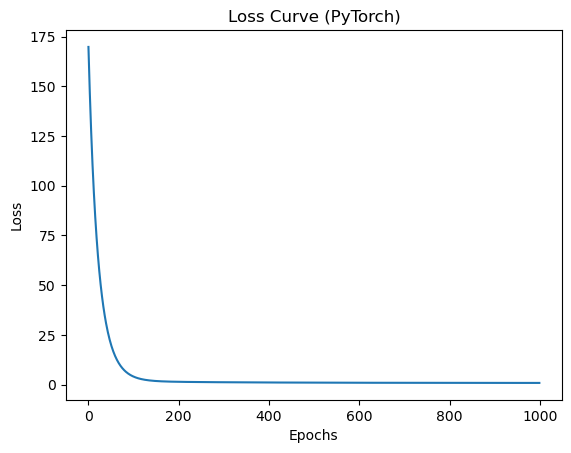

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = "nbastat2022.csv"
data = pd.read_csv(file_path)

# 필요한 열 선택 및 전처리
features = ['FGA', '3PA', 'FTA']
target = 'PTS'
data = data[features + [target]].dropna()

# 입력(X)와 출력(y) 분리 및 텐서 변환
X = torch.tensor(data[features].values, dtype=torch.float32)
y = torch.tensor(data[target].values.reshape(-1, 1), dtype=torch.float32)

# 데이터 정규화 (선택 사항)
X_mean, X_std = X.mean(dim=0), X.std(dim=0)
X = (X - X_mean) / X_std

# 모델 정의: 선형 회귀 모델 클래스 생성
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(X.shape[1], 1)  # 입력 크기: 특성 개수, 출력 크기: 1

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# 손실 함수와 옵티마이저 정의
criterion = torch.nn.MSELoss()  # Mean Squared Error Loss 사용
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저 사용

# 손실 값을 저장할 리스트
losses = []

# 학습 과정
epochs = 2000
for epoch in range(epochs):
    # 순전파: 예측값 계산
    y_pred = model(X)
    
    # 손실 계산
    loss = criterion(y_pred, y)
    losses.append(loss.item())  # 손실 값 저장
    
    # 역전파 및 가중치 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# 결과 출력: 가중치와 절편 확인
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# 모델 평가: 예측값 계산 및 MSE 출력
y_test_pred = model(X).detach().numpy()
mse = ((y_test_pred - y.numpy()) ** 2).mean()
print("Final Mean Squared Error (MSE):", mse)

# 손실 그래프 그리기
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve (PyTorch)")
plt.show()
